# 1083 Albumin Initial ML

### By: Ian Weimer

In [40]:
import imblearn
print("Imbalanced-Learn", imblearn.__version__)

Imbalanced-Learn 0.7.0


## Imports

In [41]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import graphviz
import pydotplus
from imblearn.over_sampling import SMOTE, SMOTENC
pd.set_option('display.max_columns', None)

## Load Albumin Data From Pre-processing and Exploratory Analysis

In [42]:
df = pd.read_csv('N04_matched_1.csv')

In [43]:
# drop insignificant vars

#df.drop(columns = ['bed_size', 'Cirrhosis', 'tenant'], inplace=True)

## Select Only Patients Who Lived (Removing Patients in 0 Class Who Died)

In [44]:
df = df.loc[df['90_day_mortality'] == 0]

In [45]:
df.shape

(2950, 17)

In [46]:
df.head()

encounterid  ICU  Cirrhosis  CCI  qSOFA  SEWS  \
0  1684f4f6-2f4a-4441-8af9-c4165f550d54    0          0    0      1     2   
1  8a39cae9-5cb0-4aa6-9d0c-dd11d86d3b09    0          0    1      0     0   
2  6a0962cf-b9f7-4c4f-ba75-fc5207722a36    0          1    0      1     2   
3  3639f1d7-780b-4766-b9e5-b70db8f617b5    0          0    0      1     3   
4  59c8a1ba-0aa9-4a0e-9764-d96eb5a2df03    0          0    4      1     3   

   diuretic  propensity_score  propensity_logit  albumin_24hrs  \
0         1          0.771511          1.216863              1   
1         1          0.551220          0.205600              1   
2         1          0.910373          2.318201              1   
3         1          0.788312          1.314781              1   
4         1          0.727234          0.980636              1   

                               personid  LOS_days  90_day_mortality  \
0  0bd4cf71-9232-4d6c-bb76-b580a813d0b8  0.743750                 0   
1  21b88c50-de34-435d-8c60-357d6d8ca892  6.963056                 0   
2  40cd7ee5-00d8-45af-8781-7ea6e956d8e9  4.140972                 0   
3  48531d48-8a10-46f1-b80d-252e08c651cd  1.348611                 0   
4  6ee7780f-14d7-4733-a47f-0b6c97e32870  9.985417                 0   

   90_day_readmission  hospital_free_days  albumin_timing  albumin  
0                 1.0                  36             1.0        1  
1                 0.0                  83             2.0        1  
2                 0.0                  14             2.0        1  
3                 0.0                   4             1.0        1  
4                 1.0                   9             2.0        1

In [47]:
df[df['albumin_24hrs'] == 1].LOS_days.describe()

count    1454.000000
mean        7.641492
std        10.691636
min         0.099306
25%         2.566334
50%         4.508385
75%         8.732115
max       119.877778
Name: LOS_days, dtype: float64

In [48]:
df[df['albumin_24hrs'] == 0].LOS_days.describe()

count    1496.000000
mean        6.873113
std         9.203372
min         0.000000
25%         1.369618
50%         4.357841
75%         8.731076
max       115.633241
Name: LOS_days, dtype: float64

In [49]:
df[df['albumin_24hrs'] == 1].hospital_free_days.describe()

count    1454.000000
mean       46.038514
std        32.358750
min         0.000000
25%        13.000000
50%        45.000000
75%        81.000000
max        90.000000
Name: hospital_free_days, dtype: float64

In [50]:
df[df['albumin_24hrs'] == 0].hospital_free_days.describe()

count    1496.000000
mean       46.177139
std        32.661414
min         0.000000
25%        13.000000
50%        44.000000
75%        82.000000
max        90.000000
Name: hospital_free_days, dtype: float64

In [51]:
df.drop(columns=['propensity_score', 'propensity_logit', 'encounterid', 'personid', 'albumin', 'albumin_timing'], inplace=True)

In [52]:
df.drop(columns=['90_day_mortality', '90_day_readmission', 'LOS_days'], inplace=True)

In [53]:
df.shape

(2950, 8)

In [54]:
df.describe()

ICU    Cirrhosis          CCI        qSOFA         SEWS  \
count  2950.000000  2950.000000  2950.000000  2950.000000  2950.000000   
mean      0.103051     0.222712     2.877288     0.435254     1.174237   
std       0.304077     0.416137     2.639629     0.584975     1.482627   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     3.000000     0.000000     1.000000   
75%       0.000000     0.000000     5.000000     1.000000     2.000000   
max       1.000000     1.000000    18.000000     3.000000     9.000000   

          diuretic  albumin_24hrs  hospital_free_days  
count  2950.000000    2950.000000         2950.000000  
mean      0.937627       0.492881           46.108814  
std       0.241873       0.500034           32.507151  
min       0.000000       0.000000            0.000000  
25%       1.000000       0.000000           13.000000  
50%       1.000000       0.000000           44.000000  
75%       1.000000       1.000000           81.750000  
max       1.000000       1.000000           90.000000

In [55]:
#df = df[['CCI', 'unknown_albumin_type', 'albumin_24hrs', '25_percent_albumin', 'LOS_days']]

In [56]:
#df['LOS_days'] = df['LOS_days']/24
#df.drop(columns=['LOS_days'], inplace=True)

In [57]:
plt.hist(df['hospital_free_days']);

In [58]:
df['hospital_free_days'].describe()

count    2950.000000
mean       46.108814
std        32.507151
min         0.000000
25%        13.000000
50%        44.000000
75%        81.750000
max        90.000000
Name: hospital_free_days, dtype: float64

In [59]:
# Calculate Tertiles

q1 = df['hospital_free_days'].quantile(q=(1/3))
q2 = df['hospital_free_days'].quantile(q=(2/3))
print(q1)
print(q2)

21.0
75.0


In [60]:
# bin the LOS_days var

HFD = df['hospital_free_days']
m = max(HFD)

bins = [0, 20, 73, m]
labels=[0, 1, 2]

# 0 - Low HFD
# 1 - Medium HFD
# 2 - High/Long HFD

df['hospital_free_days'] = pd.cut(HFD, bins=bins, labels=labels, include_lowest=True)

In [61]:
df['hospital_free_days'].value_counts()

2    1005
1     982
0     963
Name: hospital_free_days, dtype: int64

### Check DT conditions

In [62]:
df['hospital_free_days'].describe()

count     2950
unique       3
top          2
freq      1005
Name: hospital_free_days, dtype: int64

In [63]:
s_group1 = df.loc[(df['CCI'] > 1.5) & (df['albumin_24hrs'] > 0.5)]

In [64]:
s_group1['hospital_free_days'].describe()

count     741
unique      3
top         0
freq      263
Name: hospital_free_days, dtype: int64

In [65]:
s_group1_control = df.loc[(df['CCI'] < 1.5) & (df['albumin_24hrs'] < 0.5)]

In [66]:
s_group1_control['hospital_free_days'].describe()

count     387
unique      3
top         2
freq      153
Name: hospital_free_days, dtype: int64

## Modeling

In [67]:
# establish target feature, LOS_days, as y feature
y = df['hospital_free_days']
# drop target feature from features dataframe
X = df.drop(columns = ['hospital_free_days'], axis = 1)
# save dataframe column titles to list for reassigning after min max scale 
cols = X.columns

In [68]:
cols

Index(['ICU', 'Cirrhosis', 'CCI', 'qSOFA', 'SEWS', 'diuretic',
       'albumin_24hrs'],
      dtype='object')

## Standardize Data

In [69]:
#cols = X.columns

#instantiate min-max scaling object
#mm = MinMaxScaler()
# fit and transform feature dataframe
#X = pd.DataFrame(mm.fit_transform(X))
# reassign column names so new dataframe has corresponding names
#X.columns = cols

In [70]:
X.head()

ICU  Cirrhosis  CCI  qSOFA  SEWS  diuretic  albumin_24hrs
0    0          0    0      1     2         1              1
1    0          0    1      0     0         1              1
2    0          1    0      1     2         1              1
3    0          0    0      1     3         1              1
4    0          0    4      1     3         1              1

In [71]:
X.shape

(2950, 7)

## Train Test Split

In [72]:
#sm = SMOTENC(random_state=42, categorical_features = [0, 1, 2, 3, 4, 5, \
#                                                     6, 7, 8, 9, 10])
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#X_train, y_train = sm.fit_resample(X_train, y_train)

In [73]:
#sm = SMOTEN(random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#X_train, y_train = sm.fit_resample(X_train, y_train)

In [74]:
# train test split from target feature series and the predicting feature dataframe (set test size to 20% of data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 33)

In [75]:
y_train.value_counts()

2    794
1    792
0    774
Name: hospital_free_days, dtype: int64

## Multinomial Logistic Regression

In [76]:
# instantiate a Logistic Regression model without an intercept, 'liblinear' solver method
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# fit the model to X and y training sets
logreg.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

Feature: ICU Score: -0.26988
Feature: Cirrhosis Score: 0.04133
Feature: CCI Score: 0.02022
Feature: qSOFA Score: -0.11523
Feature: SEWS Score: 0.05168
Feature: diuretic Score: 0.05351
Feature: albumin_24hrs Score: -0.00261


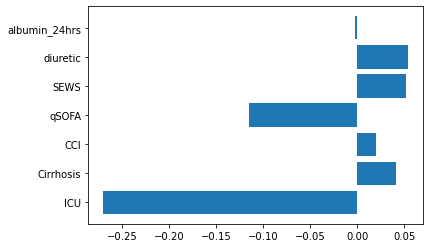

In [77]:
# general quick feature importance
# get coefficients for importance
# coefficients represent the log odds that an observation is in the
# target class, given the values of its X variables

importance = logreg.coef_[0]
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

               Importance
diuretic         1.054969
SEWS             1.053035
Cirrhosis        1.042197
CCI              1.020429
albumin_24hrs    0.997391
qSOFA            0.891164
ICU              0.763474


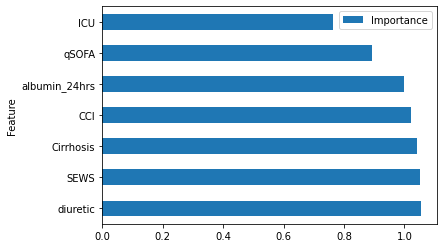

In [78]:
# convert log odds into regular odds with exponentiation
# np.exp()
# and list values, visualize in bar plot

odds = np.exp(logreg.coef_[0])
feature_importance = \
            pd.DataFrame(odds, 
             X.columns, 
             columns=['Importance'])\
            .sort_values(by='Importance', ascending=False)
        
ax = feature_importance.plot.barh(xlabel='Feature', ylabel='Importance')
print(feature_importance)
plt.show()

In [79]:
# Generate model prediction data for train and test sets
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [80]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[305 156 313]
 [269 178 345]
 [239 169 386]]


In [81]:
# model metrics for training set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.38      0.39      0.38       774
           1       0.35      0.22      0.27       792
           2       0.37      0.49      0.42       794

    accuracy                           0.37      2360
   macro avg       0.37      0.37      0.36      2360
weighted avg       0.37      0.37      0.36      2360



In [82]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[ 82  34  73]
 [ 67  46  77]
 [ 64  45 102]]


In [83]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.38      0.43      0.41       189
           1       0.37      0.24      0.29       190
           2       0.40      0.48      0.44       211

    accuracy                           0.39       590
   macro avg       0.39      0.39      0.38       590
weighted avg       0.39      0.39      0.38       590



## 1: Decision Tree 

In [84]:
# instantiate a decision tree model
# max_depth limits depth of tree, helps prevent overfitting training data
# max_depth 5
dt = tree.DecisionTreeClassifier(max_depth=7, min_samples_leaf=100)
# fit the model to X and y training sets
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=100)

In [85]:
# get importance from decision tree model
importance = dt.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

Feature: ICU Score: 0.09525
Feature: Cirrhosis Score: 0.04546
Feature: CCI Score: 0.45531
Feature: qSOFA Score: 0.23268
Feature: SEWS Score: 0.13459
Feature: diuretic Score: 0.00000
Feature: albumin_24hrs Score: 0.03672


In [86]:
# generate model prediction data for train and test sets
y_hat_train = dt.predict(X_train)
y_hat_test = dt.predict(X_test)

In [87]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[310 219 245]
 [232 317 243]
 [215 246 333]]


In [88]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.41      0.40      0.40       774
           1       0.41      0.40      0.40       792
           2       0.41      0.42      0.41       794

    accuracy                           0.41      2360
   macro avg       0.41      0.41      0.41      2360
weighted avg       0.41      0.41      0.41      2360



In [89]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[67 48 74]
 [56 74 60]
 [70 62 79]]


In [90]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.35      0.35      0.35       189
           1       0.40      0.39      0.40       190
           2       0.37      0.37      0.37       211

    accuracy                           0.37       590
   macro avg       0.37      0.37      0.37       590
weighted avg       0.37      0.37      0.37       590



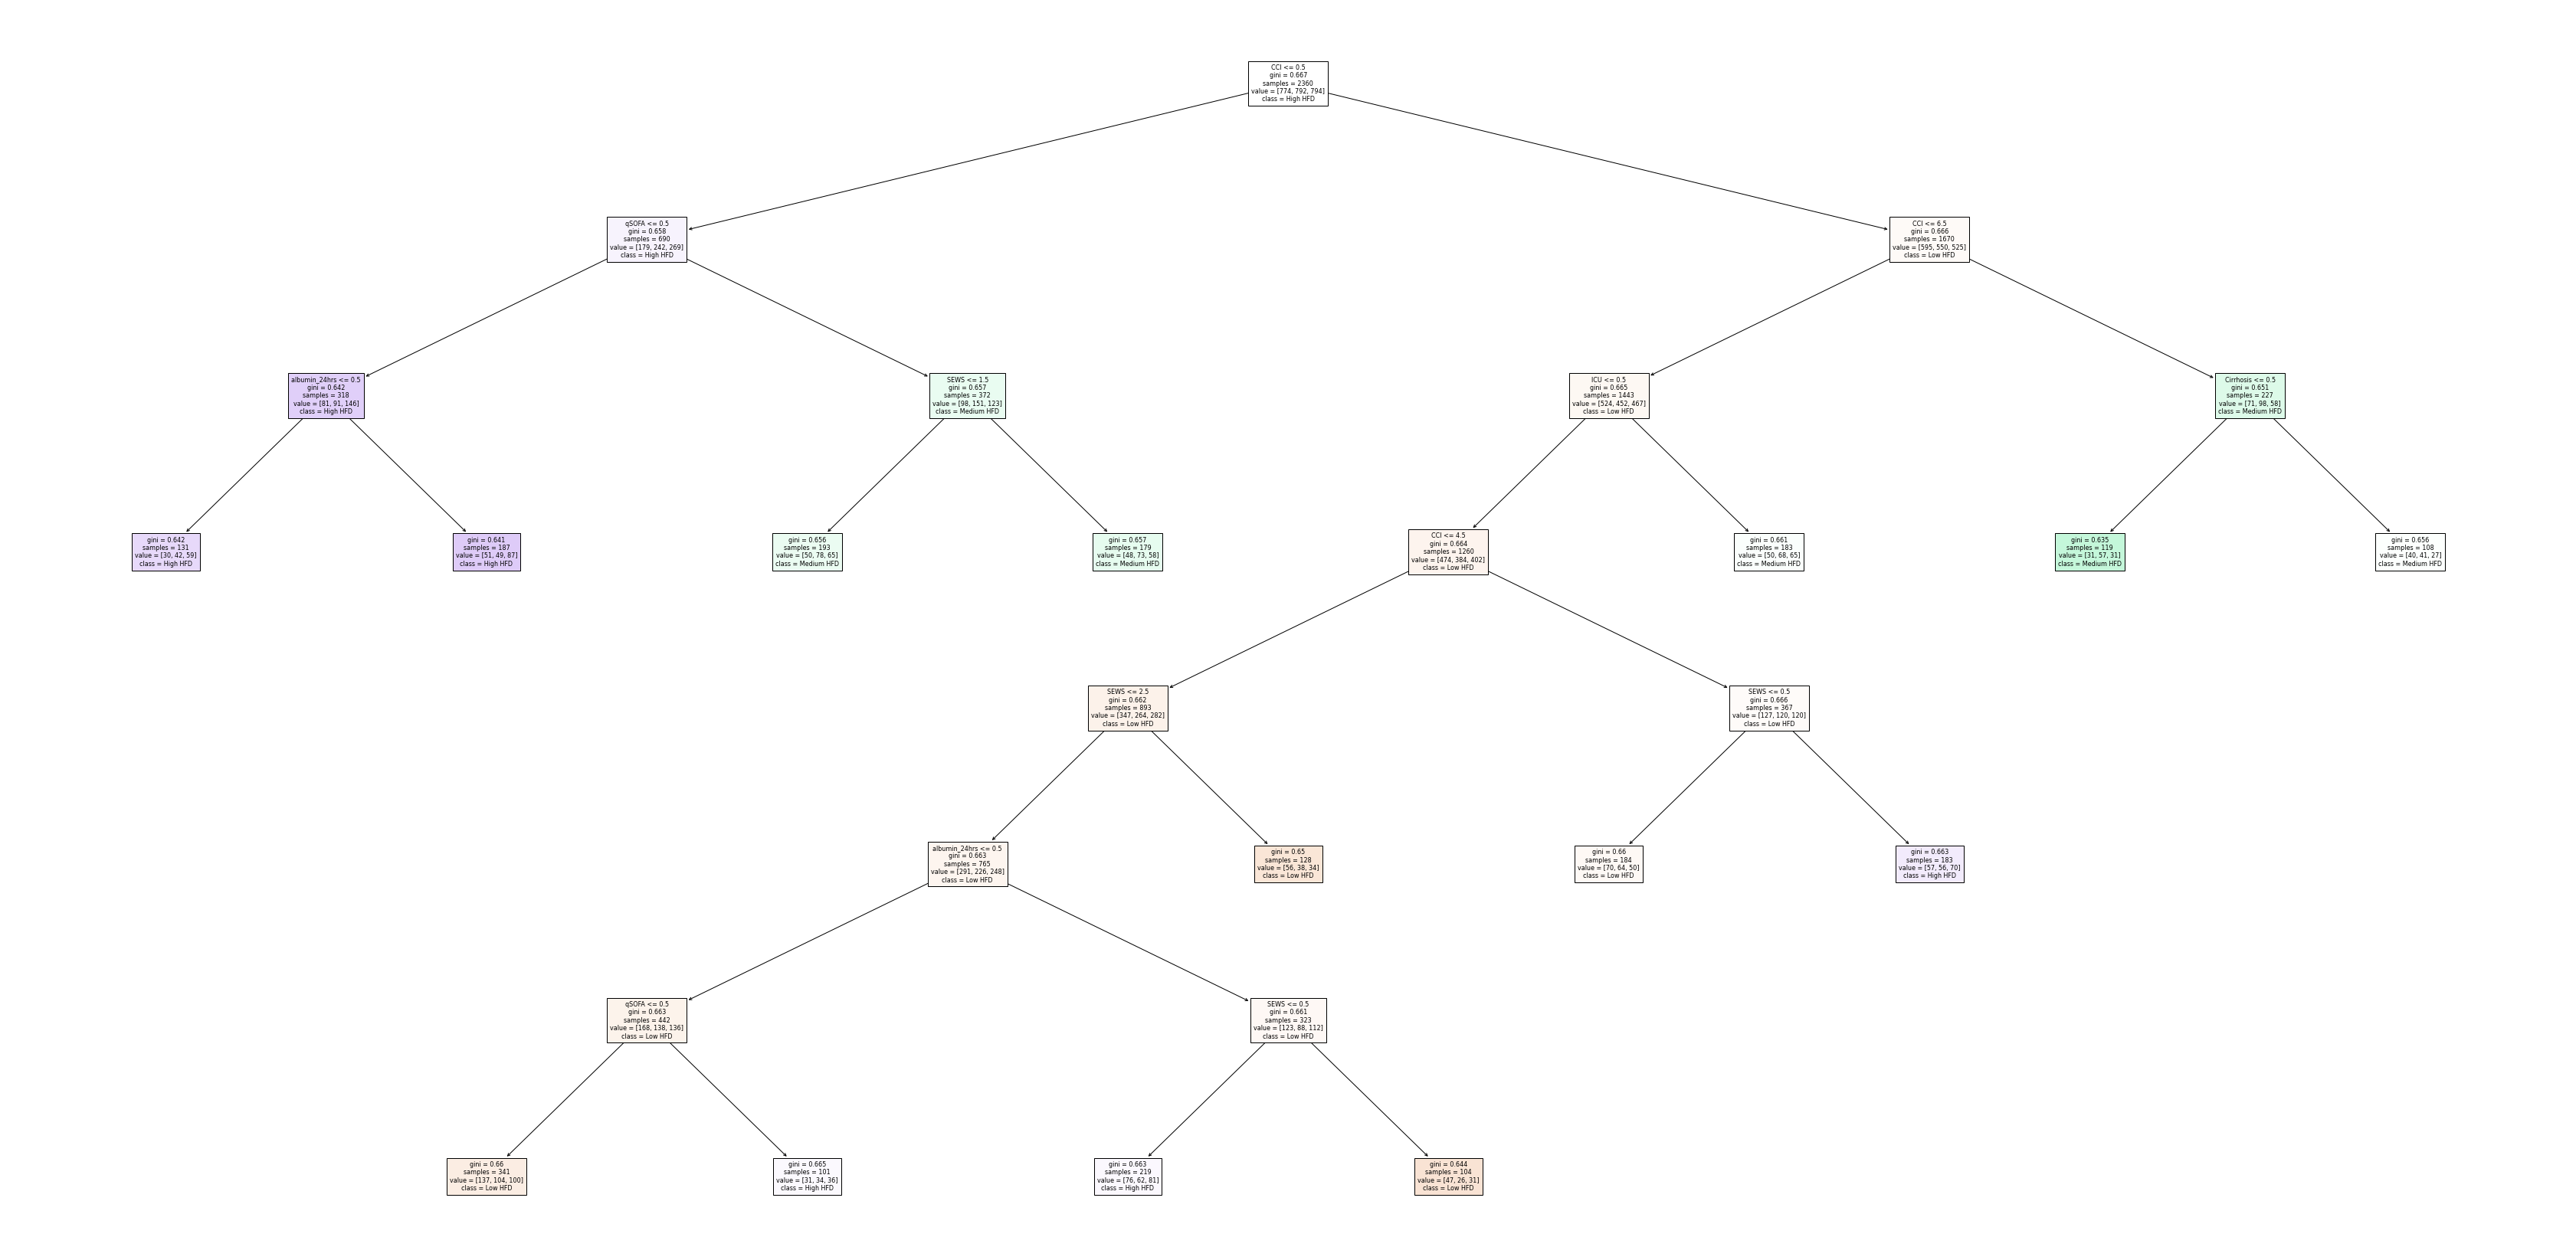

In [91]:
feature_names = X_train.columns.tolist()
class_names = ['Low HFD', 'Medium HFD', 'High HFD']

fig = plt.figure(figsize=(60,30))
_ = tree.plot_tree(dt,
                   fontsize=8,
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True)

In [92]:
dot_data = tree.export_graphviz(dt, out_file=None, 
                     feature_names=feature_names,  
                     class_names=class_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('HFD_DT_D7_PSM_MATCHED_1.png')

True

## Random Forest

In [93]:
rf = RandomForestClassifier(max_depth=8, min_samples_leaf=100)
# fit the model to X and y training sets
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=100)

In [94]:
# generate model prediction data for train and test sets
y_hat_train = rf.predict(X_train)
y_hat_test = rf.predict(X_test)

In [95]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[392 253 129]
 [291 366 135]
 [303 280 211]]


In [96]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.40      0.51      0.45       774
           1       0.41      0.46      0.43       792
           2       0.44      0.27      0.33       794

    accuracy                           0.41      2360
   macro avg       0.42      0.41      0.40      2360
weighted avg       0.42      0.41      0.40      2360



In [97]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[90 59 40]
 [73 81 36]
 [79 84 48]]


In [98]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.37      0.48      0.42       189
           1       0.36      0.43      0.39       190
           2       0.39      0.23      0.29       211

    accuracy                           0.37       590
   macro avg       0.37      0.38      0.37       590
weighted avg       0.37      0.37      0.36       590



In [99]:
# get importance from decision tree model
importance = rf.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

Feature: ICU Score: 0.07007
Feature: Cirrhosis Score: 0.04148
Feature: CCI Score: 0.48340
Feature: qSOFA Score: 0.13409
Feature: SEWS Score: 0.16802
Feature: diuretic Score: 0.00578
Feature: albumin_24hrs Score: 0.09716
